In [3]:
import matplotlib.pyplot as plt
import struct
import numpy as np

In [12]:
with open("debug_pixels/a_samples.bin", "rb") as fin:
  samples_cnt = struct.unpack("i", fin.read(4))[0]
  samples = np.array(struct.unpack("f" * samples_cnt * 2, fin.read(4 * samples_cnt * 2))).reshape(samples_cnt, 2)
  #labels = np.array(struct.unpack("i" * samples_cnt, fin.read(4 * samples_cnt)))
  #line = struct.unpack("f" * 3, fin.read(4 * 3))

with open("debug_pixels/pix_0420_0158.bin", "rb") as fin: 
   linesNum = struct.unpack("i", fin.read(4))[0]
   print("linesNum = ", linesNum)
   line = struct.unpack("f" * 3, fin.read(4 * 3))
    

linesNum =  841888305


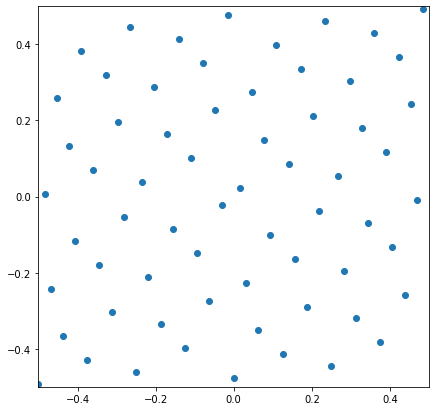

In [9]:
plt.figure(0, (7, 7))
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.plot(samples[:, 0], samples[:, 1], 'o')

#x = np.linspace(-0.5, 0.5)
#plt.plot(x, -(line[0] / line[1] * x + line[2] / line[1]))

# plt.plot([(-line[2] + 10 * line[0]) / line[1], -10], [(-line[2] - 10 * line[0]) / line[1], 10])
# plt.plot([10, (-line[2] - 10 * line[1]) / line[0]], [-10, (-line[2] + 10 * line[1]) / line[0]])
# plt.plot([-1000, (-line[2] + 1000 * line[1]) / line[0]], [(-line[2] + 1000 * line[0]) / line[1], -1000])

In [ ]:
idx = 38
line[0] * samples[idx][0] + line[1] * samples[idx][1] + line[2]

In [ ]:
labels == 1